# Proyecto Futbol

## Lectura de datos

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_results = pd.read_csv('../data/project/results.csv')

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


### Creación de la columna "ganador"

In [191]:
conditions = [
    df_results['home_score'] > df_results['away_score'],
    df_results['away_score'] > df_results['home_score'],
    df_results['home_score'] == df_results['away_score']
]

choices = [
    df_results['home_team'],
    df_results['away_team'],
    'Tie'
]

df_results['winner'] = np.select(conditions, choices)

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


## Limpieza de datos

### Eliminación de columnas duplicadas si existen

In [192]:
df_results.drop_duplicates()

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


### Eliminación de registros con datos nulos si existen

In [193]:
df_results.dropna()

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


### Eliminación de columnas innecesarias

In [194]:
df_results = df_results.drop(['tournament', 'city', 'country'], axis=1)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
0,1872-11-30,Scotland,England,0,0,False,Tie
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
3,1875-03-06,England,Scotland,2,2,False,Tie
4,1876-03-04,Scotland,England,3,0,False,Scotland
...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,False,Sint Maarten


### Validación de nombres de equipos

Se validan que los nombres de los equipos no posean espacios en blanco al inicio o al final, y que inicien en mayúscula.

In [195]:
df_results['home_team'] = df_results['home_team'].str.strip()
df_results['away_team'] = df_results['away_team'].str.strip()
df_results['home_team'] = df_results['home_team'].str.title()
df_results['away_team'] = df_results['away_team'].str.title()

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
0,1872-11-30,Scotland,England,0,0,False,Tie
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
3,1875-03-06,England,Scotland,2,2,False,Tie
4,1876-03-04,Scotland,England,3,0,False,Scotland
...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,True,Tie
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,False,Sint Maarten


### Validación de valores numéricos

Se valida que las columnas de goles anotados sean de tipo numérico.

In [196]:
df_results['home_score'] = df_results['home_score'].astype(int)
df_results['away_score'] = df_results['away_score'].astype(int)

## Datos anómalos

Funciones de graficación

In [197]:
def show_graphs(df: pd.DataFrame):
    num_col = [col for col in df.columns if(df[col].dtype in ['int','float'])]

    ncols = 2
    nrows = len(num_col)

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

    for r in range(nrows):
        row = num_col[r]
        
        
        sns.histplot(x=df[row], ax=axes[r,0], color='#F8766D', label='Histograma' , fill =True )
        
        sns.boxplot(x=df[row], ax=axes[r,1], color='#00BFC4', orient = "h")
        
        axes[r,0].title.set_text("Histogram")
        axes[r,1].title.set_text("Box Plot")

    fig.tight_layout()
    plt.show()

In [198]:
def bar_graph_winners():
  plt.figure(figsize=(80, 6))
  sns.barplot(x=df_results['winner'].value_counts().index, y=df_results['winner'].value_counts().values)
  plt.xticks(rotation=90)
  plt.title('Ganadores')
  plt.ylabel('Cantidad de partidos')
  plt.xlabel('Equipos')
  plt.show()

Funciones de transformación de datos

In [199]:
def characters_to_numbers(df, *columns):
  for column in columns:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

  return df

### Gráficos

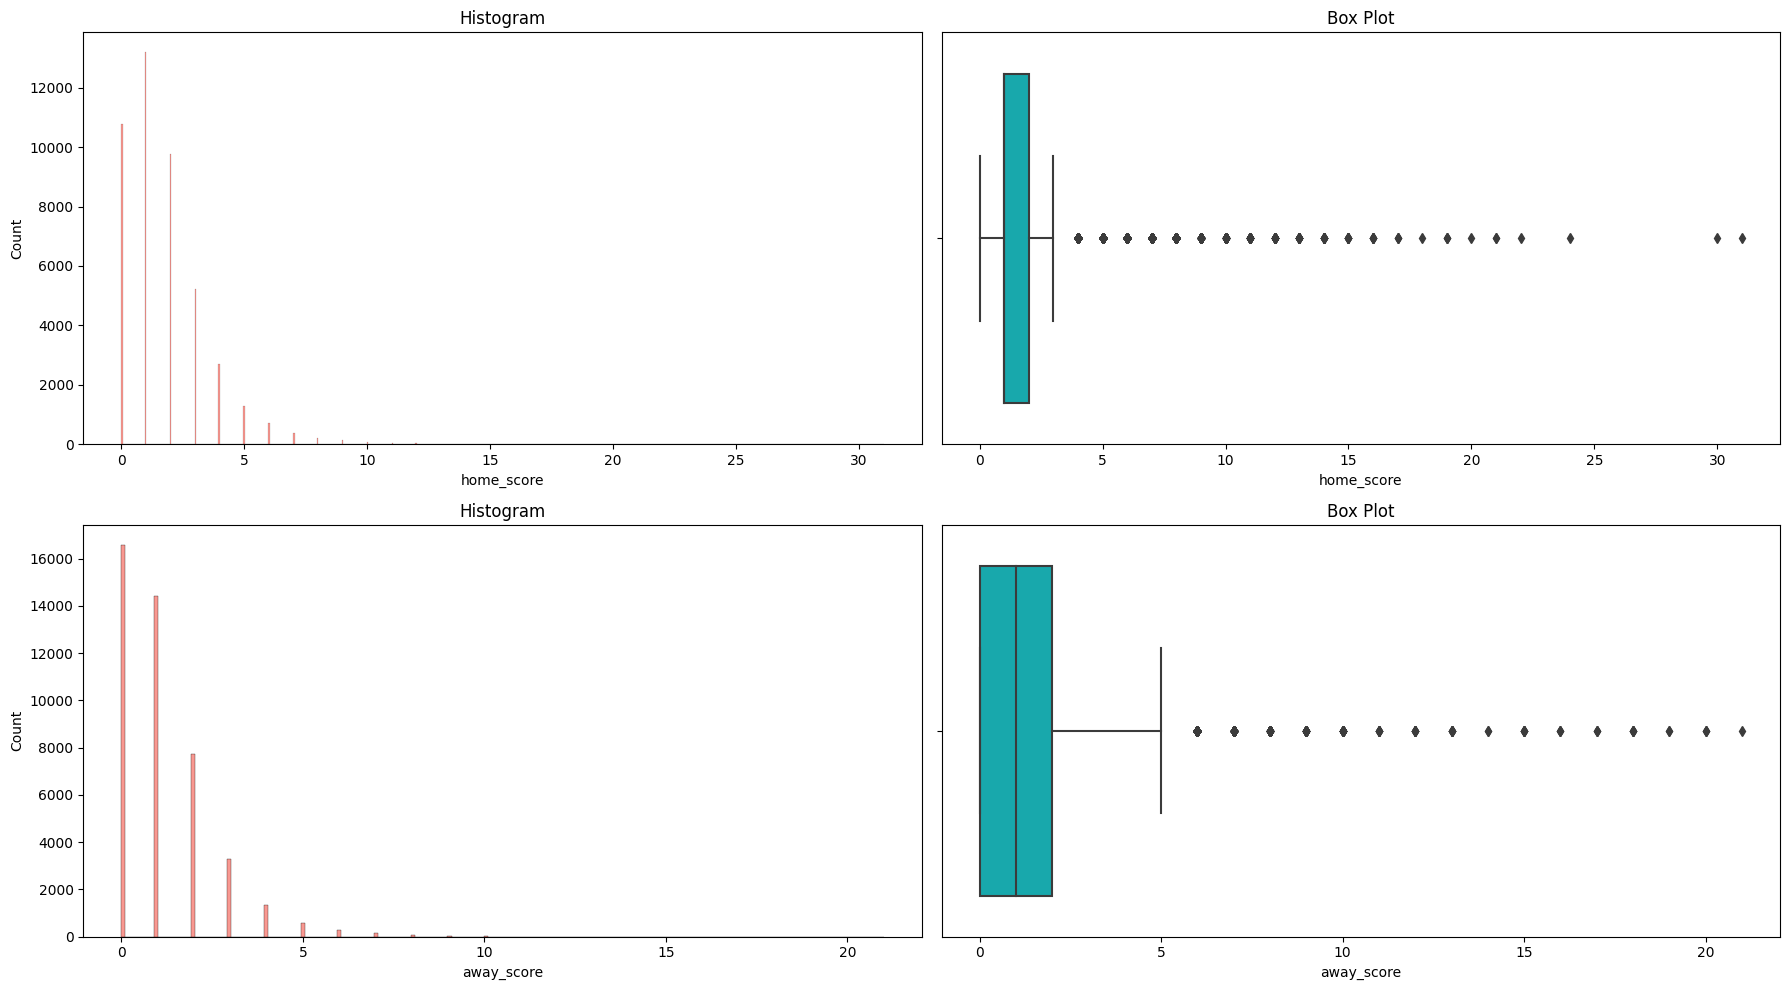

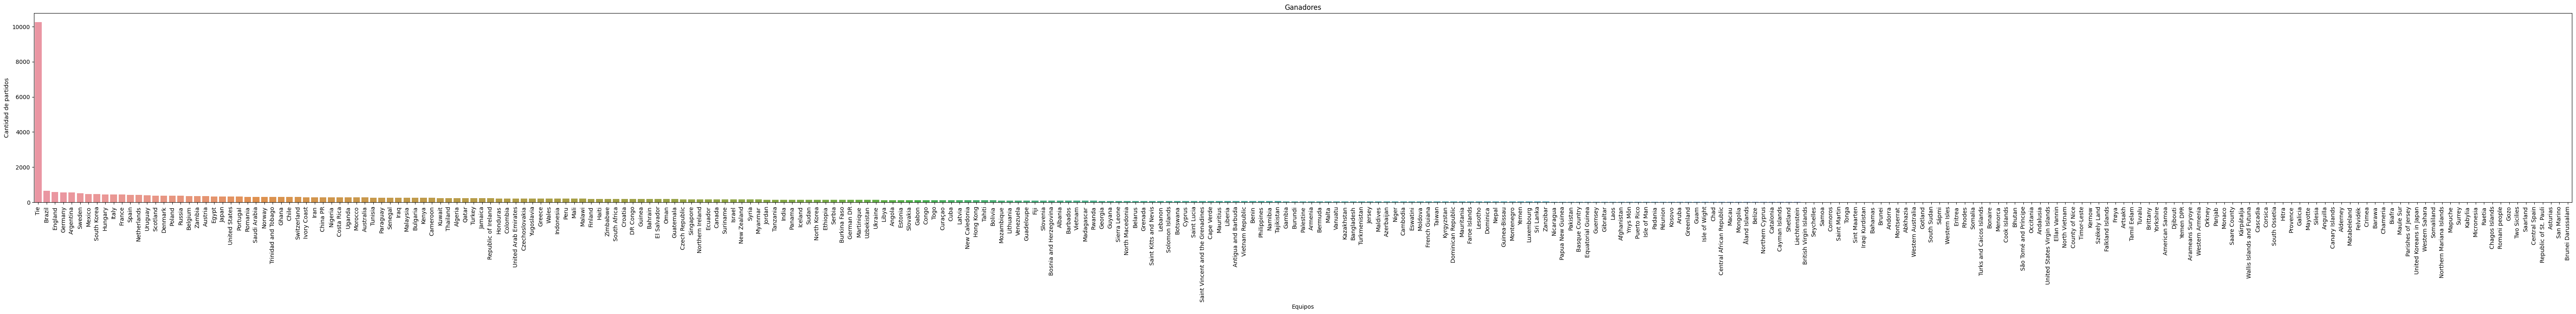

In [200]:
show_graphs(df_results)
bar_graph_winners()

### Eliminación de partidos empatados

Se eliminan los partidos empatados, ya que no son necesarios para el análisis.

In [201]:
df_results.drop(index=df_results[df_results['winner'] == 'Tie'].index, inplace=True)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


### Eliminación partidos con mas de 5 goles anotados

Se eliminan los partidos con mas de 5 goles anotados, ya que son considerados como anómalos.

In [202]:
df_results.drop(index=df_results[(df_results['home_score'] > 5) | (df_results['away_score'] > 5)].index, inplace=True)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


### Gráficos con datos limpios

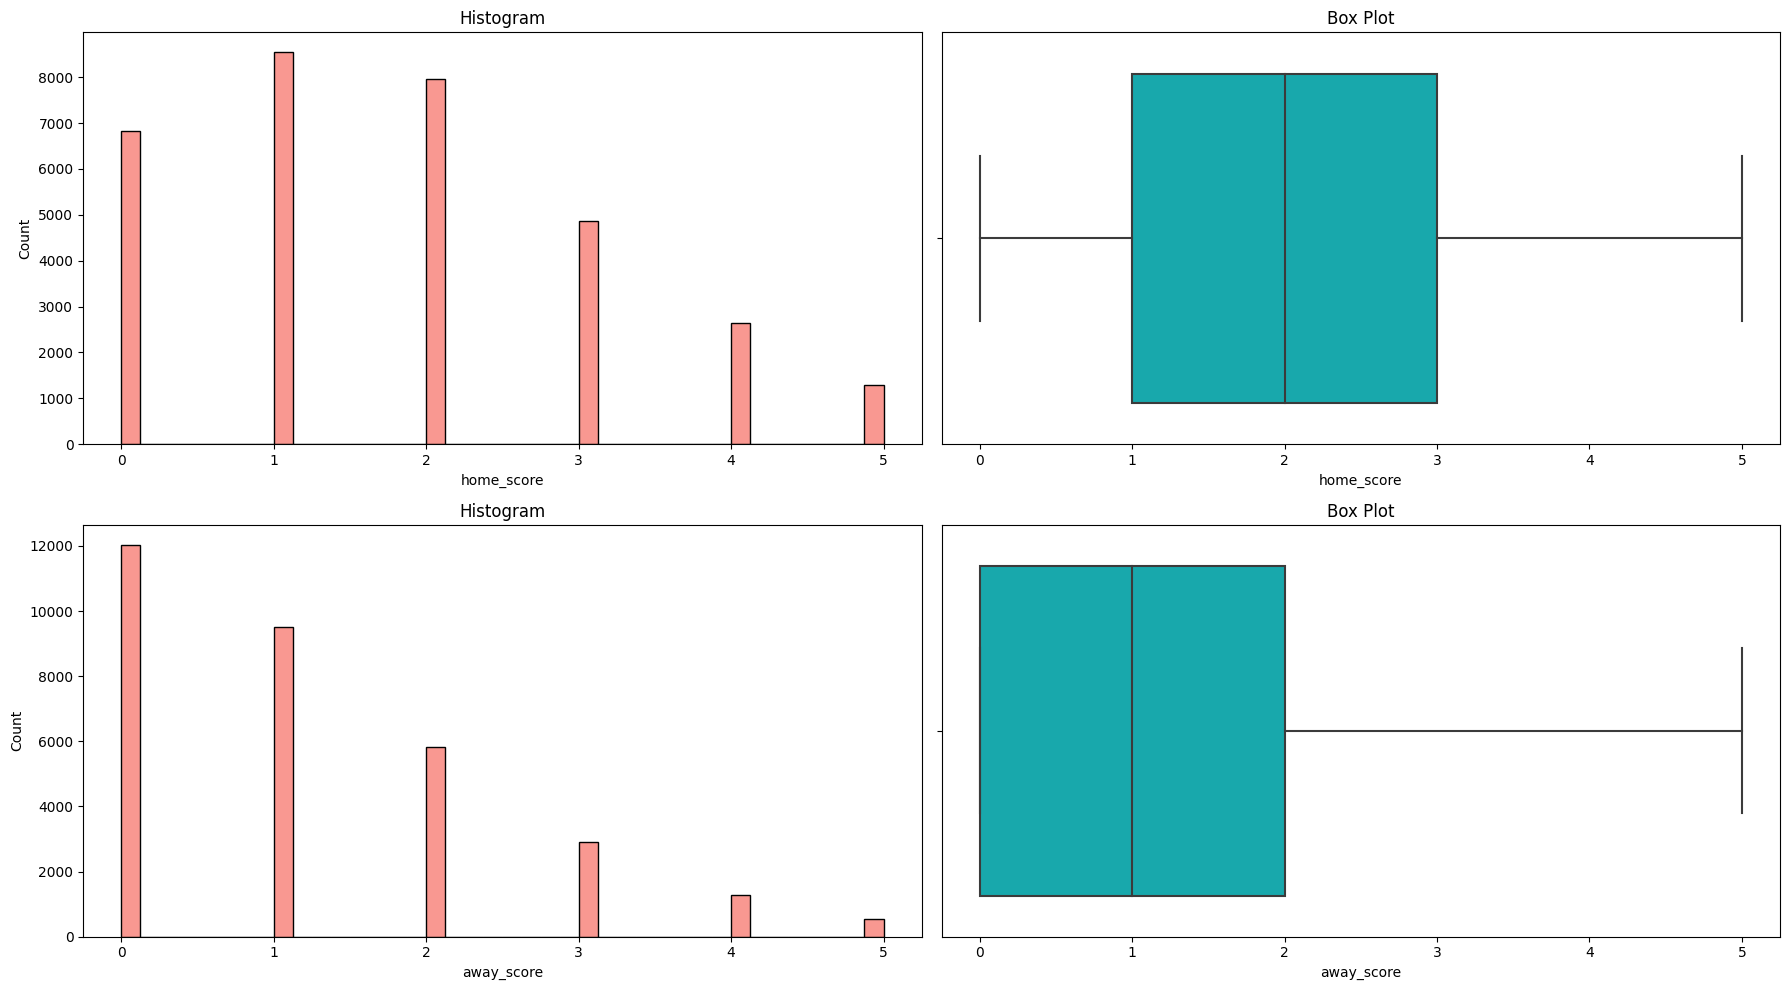

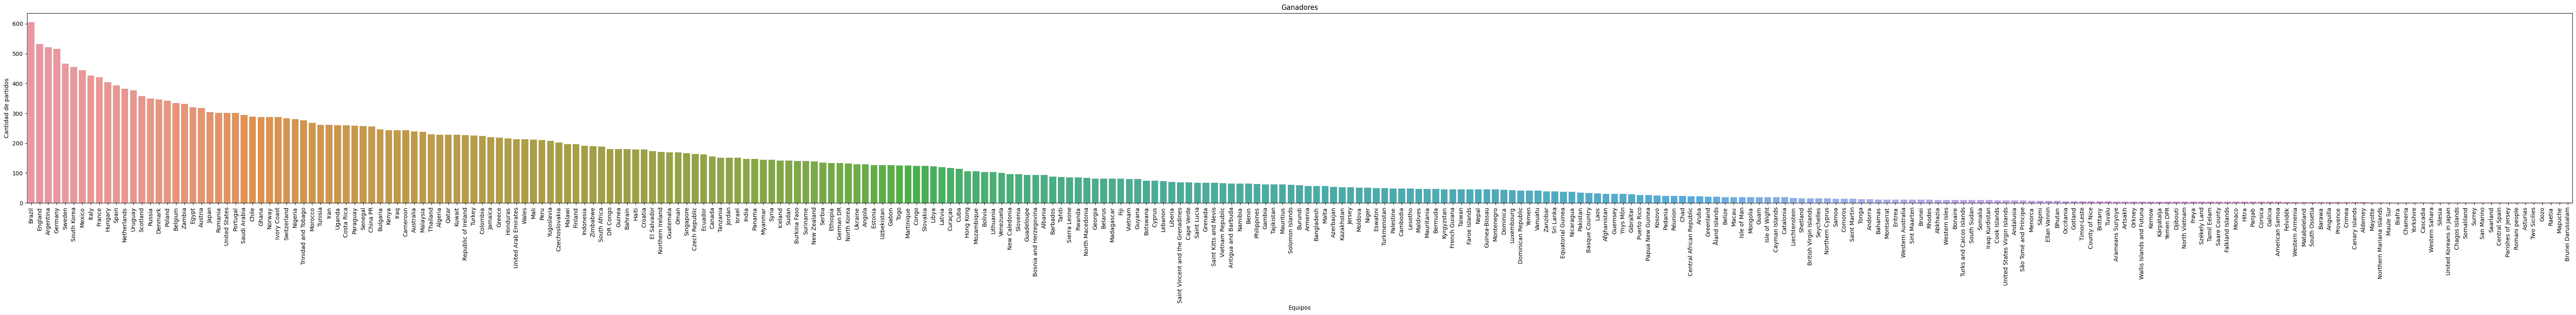

In [203]:
show_graphs(df_results)
bar_graph_winners()

In [204]:
df_results = characters_to_numbers(df_results, 'home_team', 'away_team', 'winner')

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,82,230,4,2,False,83
2,1874-03-07,230,83,2,1,False,227
4,1876-03-04,230,83,3,0,False,227
5,1876-03-25,230,288,4,0,False,227
6,1877-03-03,82,230,1,3,False,227
...,...,...,...,...,...,...,...
44550,2023-03-28,65,200,0,1,False,198
44551,2023-03-28,47,119,4,1,False,47
44552,2023-03-28,117,31,3,1,True,117
44554,2023-03-28,34,272,1,2,False,269
